# Super Store USA 2015 EDA

## Author: Sheikh Irfan Ullah Khan

### Contact Me: shirfan.math@gmail.com

In [32]:
# import the libraries
import pandas as pd # Data Manipulation
import numpy as np
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

### 1. Importing the dataset

In [33]:
df = pd.read_excel("./data/Superstore_USA.xlsx")
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [34]:
df.shape

(9426, 24)

In [35]:
df.isnull().sum().sort_values(ascending=False)

Product Base Margin     72
Row ID                   0
Order Priority           0
Sales                    0
Quantity ordered new     0
Profit                   0
Ship Date                0
Order Date               0
Postal Code              0
City                     0
State or Province        0
Region                   0
Product Name             0
Product Container        0
Product Sub-Category     0
Product Category         0
Customer Segment         0
Ship Mode                0
Customer Name            0
Customer ID              0
Shipping Cost            0
Unit Price               0
Discount                 0
Order ID                 0
dtype: int64

In [36]:
print(df['Product Base Margin'].mean())
print(df['Product Base Margin'].median())

0.5121894376737225
0.52


In [37]:
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(), inplace=True)

In [38]:
df.shape

(9426, 24)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

# Univariate Analysis

## Order Priority

In [39]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [40]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [41]:
df['Order Priority'] = df['Order Priority'].replace('Critical ', 'Critical')

In [42]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

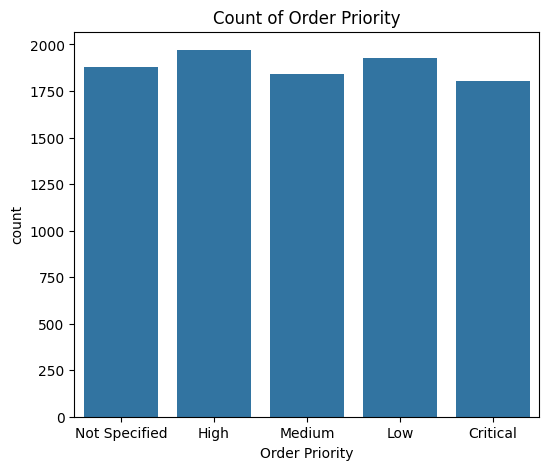

In [63]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Order Priority', data=df)
plt.title('Count of Order Priority')
plt.savefig('count_of_order_priority.png')
plt.show();

## Customer Segment

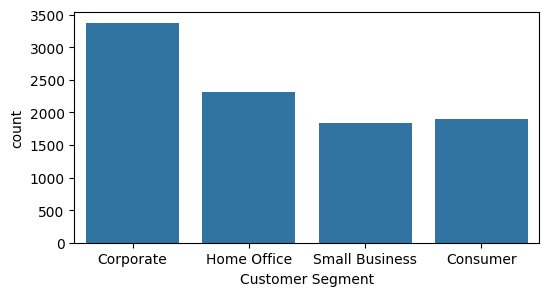

In [104]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Customer Segment', data=df)
plt.show();

### Observations
Acccording to this chart, majority of customers are corporate.

## Product Category

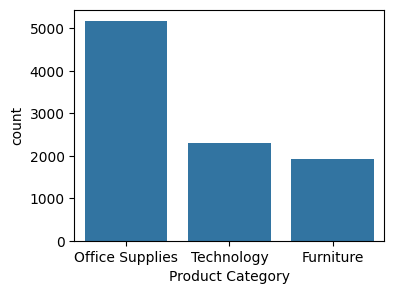

In [107]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Product Category', data=df)
plt.show();

### Observations
The maojority of products are office supplies.

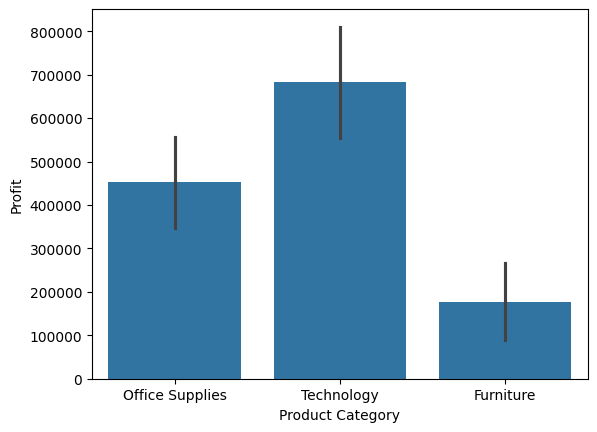

In [138]:
sns.barplot(x='Product Category', y='Profit', data=df, estimator = 'sum');

### Observations
The profit margin Techonolgy is high.

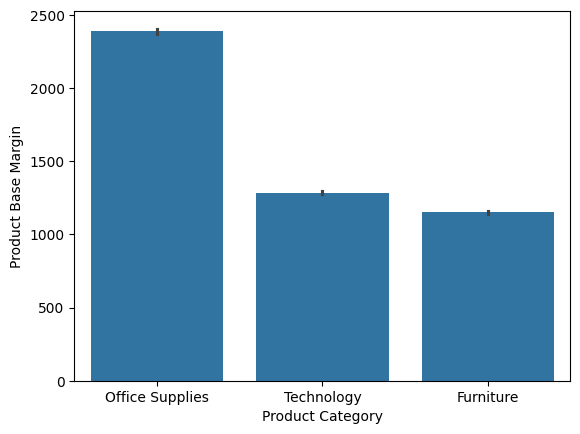

In [139]:
sns.barplot(x='Product Category', y='Product Base Margin', data=df, estimator = 'sum');

### Observations
The product based margin is low in the Furniture category.

## Product Sub-Category

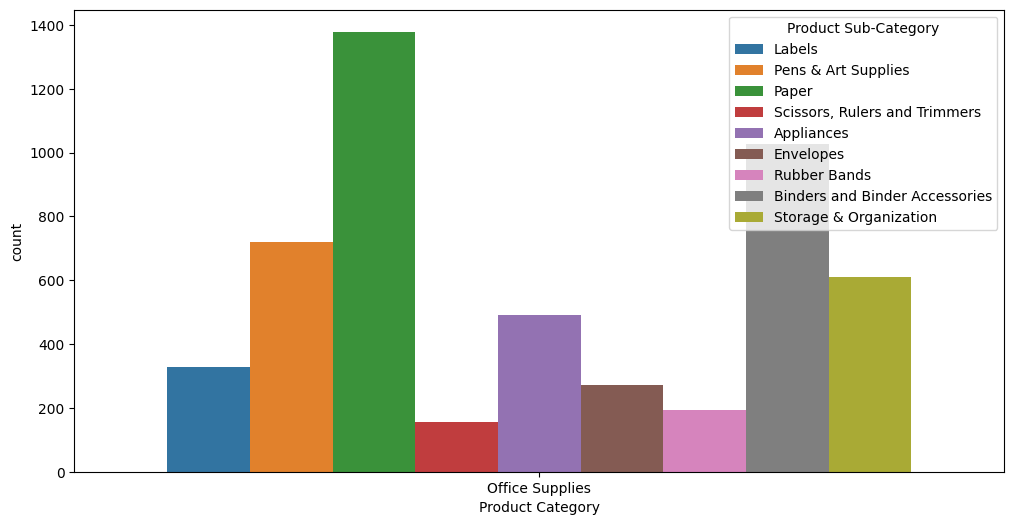

In [112]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product Category', hue = 'Product Sub-Category',
            data=df[df['Product Category'] == "Office Supplies"])
plt.show();

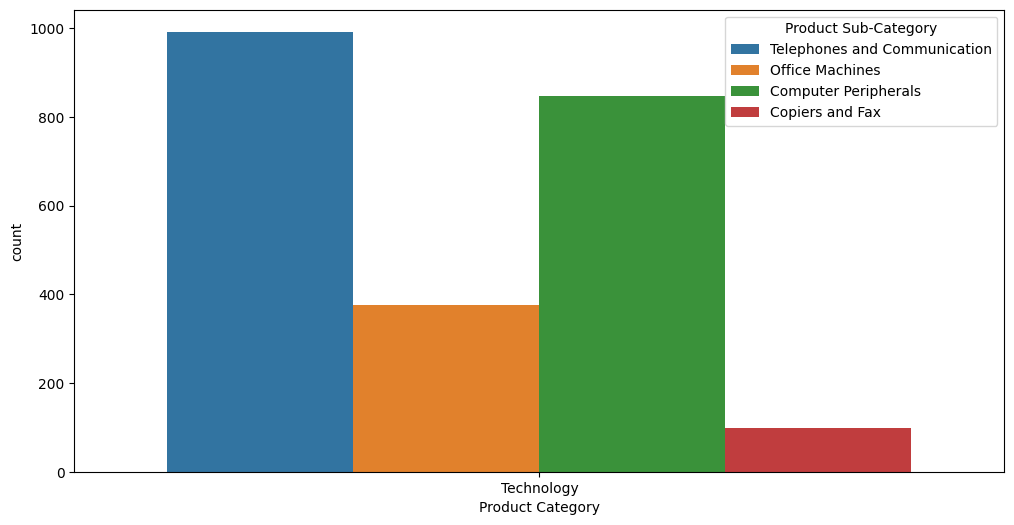

In [113]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product Category', hue = 'Product Sub-Category',
            data=df[df['Product Category'] == "Technology"])
plt.show();

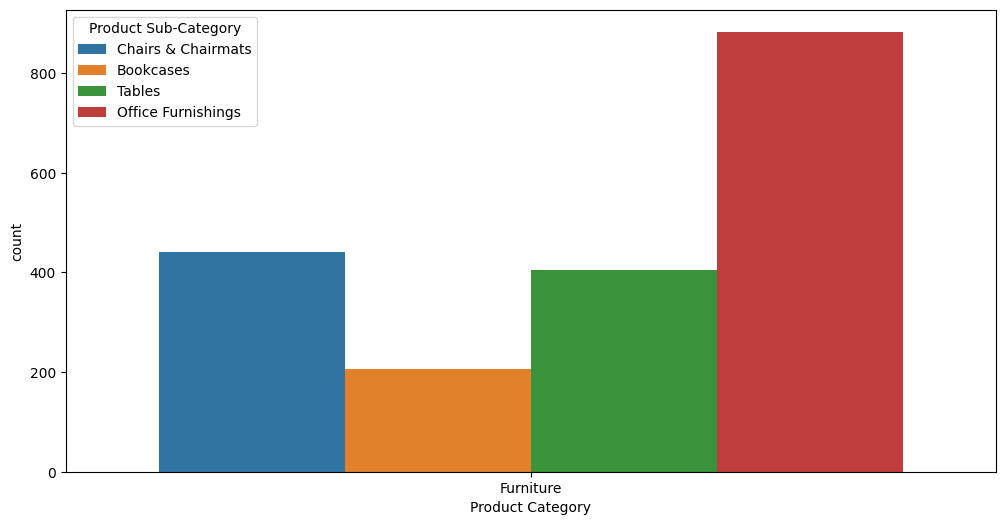

In [116]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product Category', hue = 'Product Sub-Category',
            data=df[df['Product Category'] == "Furniture"])
plt.show();

## Ship Mode

In [64]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

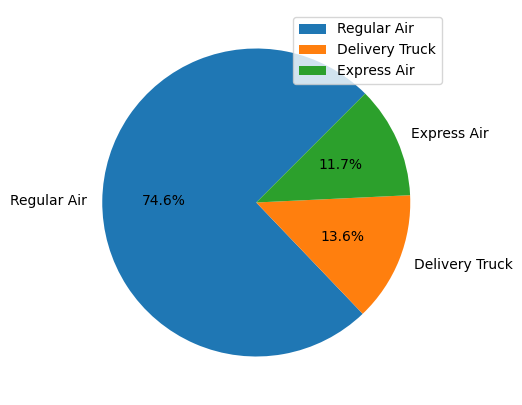

In [97]:
a = df['Ship Mode'].value_counts().index
b = df['Ship Mode'].value_counts().values

plt.figure(figsize=(6, 5))
plt.pie(b, labels=a, startangle=45, autopct='%1.1f%%')
plt.legend()
plt.show();

#### Or we can use this method as well

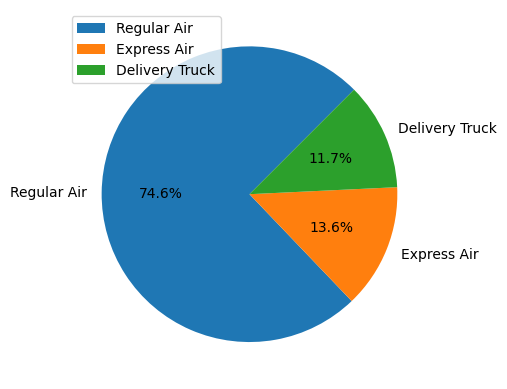

In [96]:
# make a pie chart to show the distribution of ship mode
plt.pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].unique(), startangle=45, autopct='%1.1f%%')
plt.legend()
plt.show();

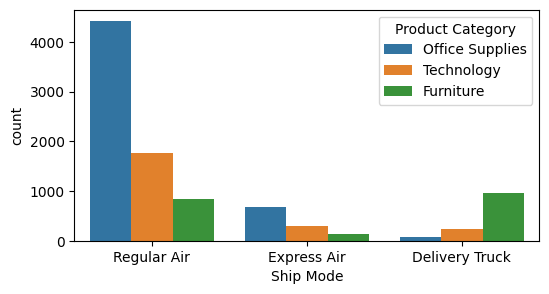

In [100]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Ship Mode', hue = 'Product Category', data=df)
plt.show();

## Order Date

In [119]:
df['Order Year'] = df['Order Date'].dt.year

In [123]:
# Check the column of Order Year include in the dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [124]:
df['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

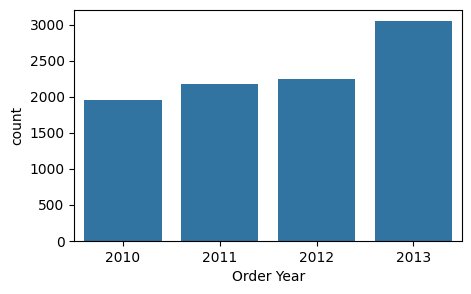

In [127]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Order Year', data=df)
plt.show();

In [134]:
df['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

In [135]:
df['Product Container'].value_counts()

Product Container
Small Box     4887
Wrap Bag      1312
Small Pack    1067
Jumbo Drum     703
Jumbo Box      590
Large Box      457
Medium Box     410
Name: count, dtype: int64

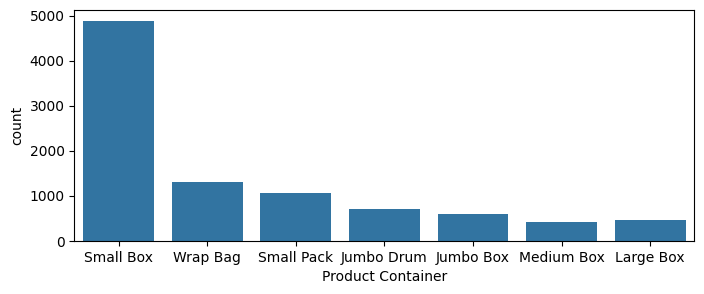

In [143]:
# Count plot of Product Container
plt.figure(figsize=(8, 3))
sns.countplot(x='Product Container', data=df)
plt.show();

### Observations
The most common product container is Small Box.